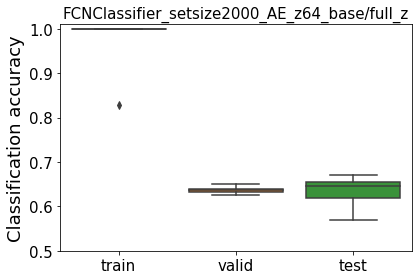

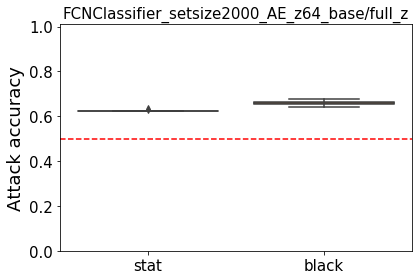

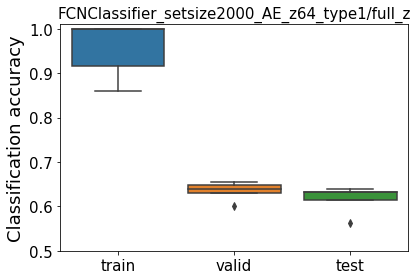

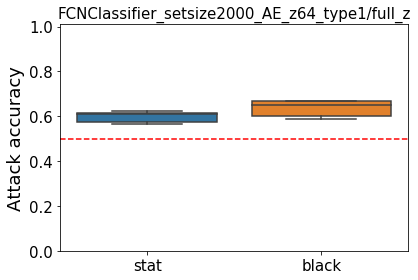

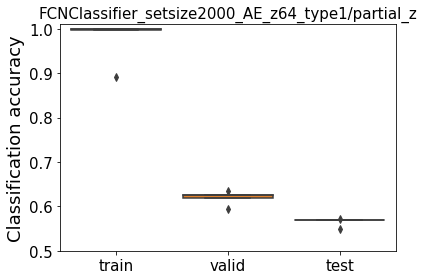

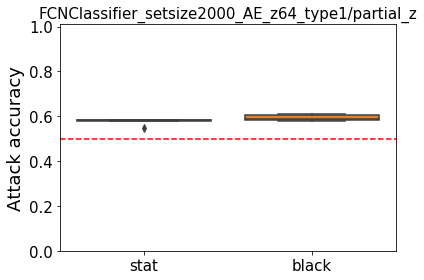

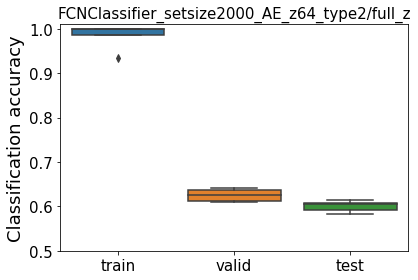

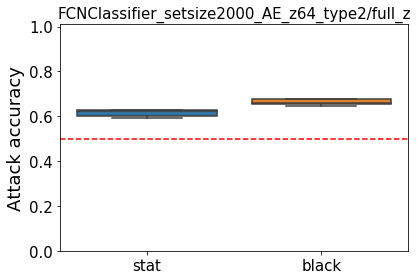

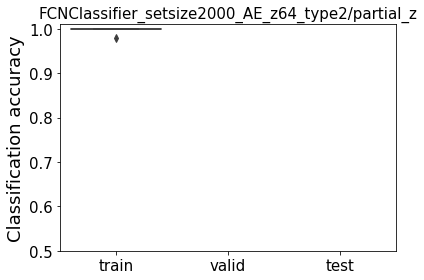

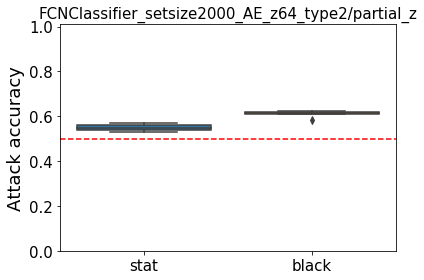

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

base_path = '/mnt/disk1/heonseok/MPMLD/output'

In [2]:
def parse_input_type(model):
    if 'original' in model:
        return 'original'
    elif 'base' in model:
        return 'base'
    elif 'type1' in model:
        return 'type1'
    elif 'type2' in model:
        return 'type2'

In [ ]:
def plot_classification_result(dataset, classification_model, fig_path):
    classification_path = os.path.join(base_path, dataset, 'classifier', classification_model)
    df = pd.DataFrame()
    for repeat in range(5):
        try:
            classification_repeat_path = os.path.join(classification_path, 'repeat{}'.format(repeat))
            acc = np.load(os.path.join(classification_repeat_path, 'acc.npy'), allow_pickle=True).item()
            df = df.append(acc, ignore_index=True)
        except FileNotFoundError:
            continue
    df = df[['train', 'valid', 'test']]
    # print(classification_path)
    # print(df)
    sns.boxplot(data=df)
    plt.ylabel('Classification accuracy', fontdict={'size': 18})
    plt.title(classification_model, fontdict={'size': 15})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(0.5, 1.01)
    # plt.yticks(np.arange(0.1, 1.01, 0.1))
    # plt.axhline(0.1, ls='--', c='r')
    plt.tight_layout()
    if 'full_z' in classification_model or 'partial_z' in classification_model:
        classification_model = classification_model.replace('/', '_')
    plt.savefig(os.path.join(fig_path, '{}.jpg'.format(classification_model)))
    # plt.savefig(os.path.join(fig_path, 'classification.jpg'))
    plt.show()
    plt.close()


In [ ]:
def plot_attack_result(dataset, classification_model, fig_path):
    df = pd.DataFrame()
    attack_type_list = ['stat', 'black']
    for repeat in range(5):
        for attack_type in attack_type_list:
            try:
                attack_path = os.path.join(base_path, dataset, 'attacker', classification_model, 'repeat{}'.format(repeat))
                acc = np.load(os.path.join(attack_path, attack_type, 'acc.npy'), allow_pickle=True)
                if attack_type == 'stat':
                    df = df.append({attack_type: acc}, ignore_index=True)
                else:
                    df = df.append({attack_type: acc.item()['test']}, ignore_index=True)
            except FileNotFoundError:
                continue

    sns.boxplot(data=df)
    plt.ylabel('Attack accuracy', fontdict={'size': 18})
    plt.title(classification_model, fontdict={'size': 15})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(0., 1.01)
    plt.axhline(0.5, ls='--', c='r')
    plt.tight_layout()

    if 'full_z' in classification_model or 'partial_z' in classification_model:
        classification_model = classification_model.replace('/', '_')
    plt.savefig(os.path.join(fig_path, '{}.jpg'.format(classification_model)))
    plt.show()
    plt.close()





In [41]:
def draw_acc_bar_plot(dataset, model_list):
    class_df = pd.DataFrame()
    attack_df = pd.DataFrame()
    for model in model_list:
        input_type = parse_input_type(model)
        class_path = os.path.join(base_path, dataset, 'classifier', model)
        attack_path = os.path.join(base_path, dataset, 'attacker', model)
        for z_type in ['full_z', 'content_z', 'style_z']:
            for repeat in range(5):
                try:
                    class_repeat_path = os.path.join(class_path, z_type, 'repeat{}'.format(repeat))
                    class_acc = np.load(os.path.join(class_repeat_path, 'acc.npy'), allow_pickle=True).item()
                    class_df = class_df.append({'Classification accuracy': class_acc['test'], 'Input':input_type, 'z type': z_type}, ignore_index=True)

                    attack_repeat_path = os.path.join(attack_path, z_type, 'repeat{}'.format(repeat), 'black')
                    # for attack_type in ['stat', 'black']:
                    #     attack_acc = np.load(os.path.join(attack_path, attack_type, 'acc.npy'), allow_pickle=True)
                    #     if not attack_type == 'stat':
                    #         attack_acc = attack_acc['test']
                    # print(attack_repeat_path)
                    attack_acc = np.load(os.path.join(attack_repeat_path, 'acc.npy'), allow_pickle=True).item()
                    # print(input_type)
                    attack_df = attack_df.append({'Attack accuracy': attack_acc['test'], 'Input':input_type, 'z type': z_type}, ignore_index=True)
                    # attack_df = attack_df.append({'Attack accuracy': attack_acc['test'], 'Input':input_type, 'z type': z_type, 'Attack type': attack_type}, ignore_index=True)

                except FileNotFoundError:
                    continue
    # sns.barplot(x='z type', y='Classification accuracy', data=class_df, hue='Input')
    sns.barplot(x='Input', y='Classification accuracy', data=class_df, hue='z type')
    plt.tight_layout()
    plt.show()
    plt.close()

    # print(attack_df)
    sns.barplot(x='Input', y='Attack accuracy', data=attack_df, hue='z type')
    plt.tight_layout()
    plt.show()




In [ ]:
if __name__ == "__main__":

    if not os.path.exists('Figs'):
        os.mkdir('Figs')

    # target_models = dict()

    # classification_model_list = [
    #     # ('CIFAR-10', 'ResNet18_setsize1000_original'),
    #     # ('CIFAR-10', 'ResNet18_setsize1000_AE_z64_base/full_z'),
    #
    #     # ('CIFAR-10', 'ResNet18_setsize10000_original'),
    #     # ('CIFAR-10', 'ResNet18_setsize10000_AE_z64_base/full_z'),
    #
    #     ('CIFAR-10', 'ResNet50_setsize10000_original'),
    #     # ('CIFAR-10', 'ResNet50_setsize20000_original'),
    #     # ('CIFAR-10', 'ResNet50_setsize10000_AE_z64_base/partial_z'),
    #     # ('CIFAR-10', 'ResNet50_setsize10000_AE_z64_base/full_z'),
    #     # ('CIFAR-10', 'ResNet50_setsize10000_AE_z64_type1/partial_z'),
    #     # ('CIFAR-10', 'ResNet50_setsize10000_AE_z64_type1/full_z'),
    #     # ('CIFAR-10', 'ResNet50_setsize10000_AE_z64_type2/partial_z'),
    #     # ('CIFAR-10', 'ResNet50_setsize10000_AE_z64_type2/full_z'),
    #
    #     # ('CIFAR-10', 'ResNet101_setsize10000_original'),
    #     # ('CIFAR-10', 'ResNet101_setsize20000_original'),
    # ]

    # classification_model_list = [
    #     ('adult', 'FCN_setsize100_original'),
    #     # ('adult', 'FCN_setsize100_AE_z8_base/partial_z'),
    #     # ('adult', 'FCN_setsize100_AE_z8_type1/partial_z'),
    #     # ('adult', 'FCN_setsize100_AE_z8_type2/partial_z'),
    #     ('adult', 'FCN_setsize1000_original'),
    #     ('adult', 'FCN_setsize10000_original')
    # ]

    # classification_model_list = [
    #     ('MNIST', 'ConvClassifier_setsize200_original'),
    #     ('MNIST', 'ConvClassifier_setsize300_original'),
    #     ('MNIST', 'ConvClassifier_setsize400_original'),
    #     ('MNIST', 'ConvClassifier_setsize500_original'),
    #     ('MNIST', 'ConvClassifier_setsize1000_original'),
    #     ('MNIST', 'ConvClassifier_setsize10000_original'),
    # ]

    # classification_model_list = [
    #     # ('Fashion-MNIST', 'ConvClassifier_setsize200_original'),
    #     # ('Fashion-MNIST', 'ConvClassifier_setsize300_original'),
    #     # ('Fashion-MNIST', 'ConvClassifier_setsize400_original'),
    #     ('Fashion-MNIST', 'ConvClassifier_setsize500_original'),
    #     ('Fashion-MNIST', 'ConvClassifier_setsize1000_original'),
    #     ('Fashion-MNIST', 'ConvClassifier_setsize10000_original'),
    # ]

    classification_model_list = [
        # ('location', 'FCNClassifier_setsize500_original'),
        # ('location', 'FCNClassifier_setsize1000_original'),
        # ('location', 'FCNClassifier_setsize2000_original'),
        ('location', 'FCNClassifier_setsize2000_AE_z64_base/full_z'),
        ('location', 'FCNClassifier_setsize2000_AE_z64_type1/full_z'),
        ('location', 'FCNClassifier_setsize2000_AE_z64_type1/partial_z'),
        ('location', 'FCNClassifier_setsize2000_AE_z64_type2/full_z'),
        ('location', 'FCNClassifier_setsize2000_AE_z64_type2/partial_z'),
    ]

    for (dataset, classification_model) in classification_model_list:
        fig_path = os.path.join('Figs', dataset, 'classification')
        if not os.path.exists(fig_path):
            os.makedirs(fig_path)
        plot_classification_result(dataset, classification_model, fig_path)

        fig_path = os.path.join('Figs', dataset, 'attack')
        if not os.path.exists(fig_path):
            os.makedirs(fig_path)
        plot_attack_result(dataset, classification_model, fig_path)

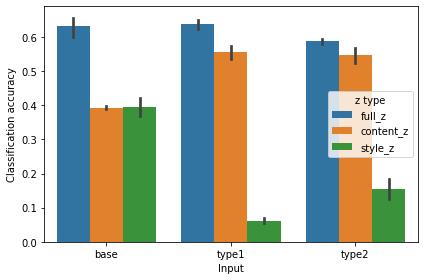

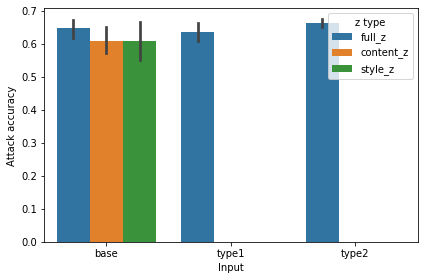

In [42]:
location_model_list = [
    # 'FCNClassifier_setsize2000_original',
    'FCNClassifier_setsize2000_AE_z64_base',
    'FCNClassifier_setsize2000_AE_z64_type1',
    'FCNClassifier_setsize2000_AE_z64_type2',
]
draw_acc_bar_plot('location', location_model_list)